In [ ]:
# Jan Czechowicz, s5767512

# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [2]:
# Q1 (code)
# Install libraries:
!pip install tomotopy
!pip install little-mallet-wrapper

# Import them:
import tomotopy as tp
import little_mallet_wrapper


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [13]:
# Q2 (code)
import pandas as pd

# Load the data:
sanders_tweets = pd.read_csv('sanders_tweets.csv')
trump_tweets = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets:
combined_tweets = pd.concat([sanders_tweets, trump_tweets])

# Display the first few rows to check:
print(combined_tweets.head())

# Get information about dataset:
combined_tweets.info()


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  
<class 'pandas.core.frame.DataFrame'>
Index: 30371 entries, 0 to 23074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  30371 non-null  object
 1   TweetId   30371 non-null  i

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [26]:
# Q3 (code)
# Initialize the lists:
training_data = []
original_texts = []
titles = []

# Define the unnecessary text to remove:
text_to_remove = ['https', '//t', 'co/', 'realdonaldtrump', 'via', 'get', 'want', 'would', '//twitter']

# Process the tweets:
for index, row in combined_tweets.iterrows():
    # Get the text from the 'Content' column:
    text = row['Content']
    
    # Process the text:
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    
    # Remove unnecessary symbols or words:
    processed_words = processed_text.split()
    filtered_words = []
    for word in processed_words:
        if word not in text_to_remove:
            filtered_words.append(word)
    processed_text = ' '.join(filtered_words)
    
    # Add processed text to training_data:
    training_data.append(processed_text)
    
    # Add original text to original_texts:
    original_texts.append(text)
    
    # Add title to titles:
    titles.append(row['Title'])

# Check if everything is ok:
print(len(training_data), len(original_texts), len(titles))


30371 30371 30371


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [27]:
# Q4 (code)
# Number of topics to return:
num_topics = 20

# Initialize the model:
model = tp.LDAModel(k=num_topics)

# Add each document to the model:
for doc in training_data:
    model.add_doc(doc.strip().split())

print("TOPIC MODEL TRAINING PROCESS: \n")
# Iterate over the data 10 times:
iterations = 10
for i in range(0, 300, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# Save the model:
model.save("lda_model.bin")

# Load the model:
loaded_model = tp.LDAModel.load("lda_model.bin")


TOPIC MODEL TRAINING PROCESS: 

Iteration: 0	Log-likelihood: -9.830383337558168
Iteration: 10	Log-likelihood: -9.372103063833176
Iteration: 20	Log-likelihood: -9.188620325382386
Iteration: 30	Log-likelihood: -9.097346213866848
Iteration: 40	Log-likelihood: -9.032785774093774
Iteration: 50	Log-likelihood: -8.990367274710547
Iteration: 60	Log-likelihood: -8.956401373360277
Iteration: 70	Log-likelihood: -8.930237479203383
Iteration: 80	Log-likelihood: -8.907510462730023
Iteration: 90	Log-likelihood: -8.891738821182983
Iteration: 100	Log-likelihood: -8.873560486235007
Iteration: 110	Log-likelihood: -8.85526450150583
Iteration: 120	Log-likelihood: -8.846762484556102
Iteration: 130	Log-likelihood: -8.834919778646073
Iteration: 140	Log-likelihood: -8.829210436859153
Iteration: 150	Log-likelihood: -8.822379589117162
Iteration: 160	Log-likelihood: -8.81176871368895
Iteration: 170	Log-likelihood: -8.808628419207897
Iteration: 180	Log-likelihood: -8.799482889739178
Iteration: 190	Log-likelihood: 

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [28]:
# Q5a (code)
# Define the number of topics and the number of words per topic:
num_topics = loaded_model.k
num_topic_words = 10

# Print out top 10 words for each topic:
print("\nTOPIC MODEL RESULTS:\n")
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in loaded_model.get_topic_words(topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"TOPIC {topic_number + 1}\n{topic_words}\n")



TOPIC MODEL RESULTS:

TOPIC 1
senate war house democrats trump people president pelosi congress vote

TOPIC 2
biden joe people president never years like democrats left going

TOPIC 3
border wall must country democrats people security immigration great illegal

TOPIC 4
workers tax pay wage billion million taxes people america class

TOPIC 5
fbi trump collusion witch russia hunt mueller hillary campaign clinton

TOPIC 6
president today small federal help support act businesses whitehouse bill

TOPIC 7
news fake media cnn people even story bad new never

TOPIC 8
people security must trump social republicans americans working cut right

TOPIC 9
great president united house today states korea white meeting forward

TOPIC 10
coronavirus covid testing world million virus vaccine lives cases spread

TOPIC 11
great vote endorsement total state strong military complete amendment big

TOPIC 12
trump great president thank america new book make donald first

TOPIC 13
health care people americans 

####  Q5b (words) 
**Describe what each topic is about. What ideas, values, or situations do these keywords refer to?**

*The original output can be found in the cell below.* 

- Topic 1: This topic appears to revolve around international conflicts and geopolitical tensions, with mentions of war, Iran, North Korea, Saudi Arabia, and nuclear issues.
- Topic 2: seems to focus on legislative actions and political dynamics within the Senate, with mentions of voting, the Supreme Court, Republicans, and congressional bills. 
- Topic 3: likely portrays the impeachment proceedings against the president, with mentions of Democrats, House Speaker Pelosi, and the whistleblower. 
- Topic 4: appears to center around environmental concerns and calls for collective action, with mentions of climate change, energy, and standing together as a country. 
- Topic 5: discuss the COVID-19 pandemic and government responses, with mentions of coronavirus, federal assistance, and small businesses. 
- Topic 6: appears to focus on immigration issues and debates surrounding border security, with mentions of the border wall, Democrats, and immigration enforcement. 
- Topic 7: express gratitude and national pride, with mentions of greatness, thankfulness, and patriotism. 
- Topic 8: concentrates on investigations and controversies surrounding the Trump administration, with mentions of Russia, the FBI, collusion, and the Mueller investigation. 
- Topic 9: seems to revolve around general remarks about the United States and its leadership, with mentions of states, the president, and optimism. 
- Topic 10: discuss electoral politics, with mentions of elections, parties, and voting. 
- Topic 11: focuses on economic issues and concerns about income inequality, with mentions of workers, wages, jobs, and the economy. 
- Topic 12: likely about healthcare and tax policies, with mentions of healthcare, taxes, Medicare, and drug prices. 
- Topic 13: appears to address trade relations and economic deals, with mentions of China, trade, and economic growth. 
- Topic 14: involves political figures and party affiliations, with mentions of Trump, Biden, Obama, and Democrats. 
- Topic 15: expresses optimism and ambition for national progress, with mentions of greatness, new opportunities, and job creation. 
- Topic 16: discusses media coverage and public perceptions, with mentions of Fox News, Trump, and media narratives.
- Topic 17: appears to express support for the military and veterans, with mentions of endorsements, military strength, and amendments.
- Topic 18: seems to focus on presidential activities and events, with mentions of the president, White House, and public appearances. 
- Topic 19: address concerns about media credibility and misinformation, with mentions of fake news and skepticism towards media narratives.
- Topic 20: discusses education and student debt issues, with mentions of debt, college, education, and student support. 

In [54]:
'''
TOPIC MODEL RESULTS:

TOPIC 1
war iran north korea saudi trump military hurricane yemen nuclear

TOPIC 2
senate must vote court republicans bill right congress people supreme

TOPIC 3
impeachment democrats president schiff house nothing call dems pelosi whistleblower

TOPIC 4
people must change climate country american trump stand together energy

TOPIC 5
coronavirus covid federal help government small need must businesses act

TOPIC 6
border wall democrats security country must immigration want illegal street

TOPIC 7
great thank today day country women people american honor nation

TOPIC 8
russia fbi trump collusion mueller witch hillary hunt campaign clinton

TOPIC 9
states united great president good many forward meeting look well

TOPIC 10
election republican vote party win democrats democrat votes get people

TOPIC 11
workers wage million jobs wealth year americans living american economy

TOPIC 12
care health tax people americans trump medicare drug million right

TOPIC 13
china jobs trade economy great deal ever years much big

TOPIC 14
trump biden joe president left sleepy would obama radical democrats

TOPIC 15
great thank america big see new make get state job

TOPIC 16
foxnews trump general new judge tonight book seanhannity court secretary

TOPIC 17
great endorsement total complete military strong vets amendment vote crime

TOPIC 18
president whitehouse trump today house white live great thank join

TOPIC 19
news fake media people even never like would bad many

TOPIC 20
debt free public college education student make school people street

'''

'\nTOPIC MODEL RESULTS:\n\nTOPIC 1\nwar iran north korea saudi trump military hurricane yemen nuclear\n\nTOPIC 2\nsenate must vote court republicans bill right congress people supreme\n\nTOPIC 3\nimpeachment democrats president schiff house nothing call dems pelosi whistleblower\n\nTOPIC 4\npeople must change climate country american trump stand together energy\n\nTOPIC 5\ncoronavirus covid federal help government small need must businesses act\n\nTOPIC 6\nborder wall democrats security country must immigration want illegal street\n\nTOPIC 7\ngreat thank today day country women people american honor nation\n\nTOPIC 8\nrussia fbi trump collusion mueller witch hillary hunt campaign clinton\n\nTOPIC 9\nstates united great president good many forward meeting look well\n\nTOPIC 10\nelection republican vote party win democrats democrat votes get people\n\nTOPIC 11\nworkers wage million jobs wealth year americans living american economy\n\nTOPIC 12\ncare health tax people americans trump medi

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [29]:
# There are different metrics for coherence, we choose `c_v`:
# Calculate coherence:
coh = tp.coherence.Coherence(loaded_model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(loaded_model.k)]

# Calculate minimum and maximum coherence:
min_coherence = min(coherence_per_topic)
max_coherence = max(coherence_per_topic)

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence)
print('Minimum:', min_coherence)
print('Maximum:', max_coherence)

# Print coherence per topic on separate lines:
print('\nPer Topic:')
for i, score in enumerate(coherence_per_topic):
    print('Topic {}: {}'.format(i+1, score))


==== Coherence : c_v ====
Average: 0.5966223853081464
Minimum: 0.44559813290834427
Maximum: 0.7928558140993118

Per Topic:
Topic 1: 0.4971555233001709
Topic 2: 0.5002103395760059
Topic 3: 0.5280769735574722
Topic 4: 0.6829633608460426
Topic 5: 0.7928558140993118
Topic 6: 0.5449867852032184
Topic 7: 0.5906468473374844
Topic 8: 0.5303175508975982
Topic 9: 0.510240563750267
Topic 10: 0.7034318208694458
Topic 11: 0.7000342398881912
Topic 12: 0.44559813290834427
Topic 13: 0.6021005183458328
Topic 14: 0.5879387736320496
Topic 15: 0.6201377063989639
Topic 16: 0.6812529504299164
Topic 17: 0.5926205672323703
Topic 18: 0.5492530673742294
Topic 19: 0.6990918785333633
Topic 20: 0.5735342919826507


### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

#### Q6 (words)
In the initial phase of the research, the model was trained on 10 topics. The average coherence score across all topics was approximately 0.567. The highest coherence score was approximately 0.750 for Topic 9, and the lowest coherence score was approximately 0.448 for Topic 2. 

In general, the model showed progress and better coherence scores (results) while expanding the number of possible topics. For example with 25 topics the score average was 0.614 with a minimum score of 0.459, and a maximum of 0.787. Furthermore, with training the model on 50 topics, the average score was 0.660, with a minimum of 0.528 and a maximum of 0.803. For 100 topics the scores were respectively an average of  0.683, a minimum of 0.523 (which is lower than while training model for 25 topics), and a maximum of 0.872. For 250 topics the average score was 0.717, with a minimum of 0.568, and a maximum of 0.905 (sic!). Finally, for 500 topics the model-averaged score was 0.749 with a minimal value of 0.623, and a maximum score of 0.956. Nevertheless, at this point, the computations started to take a long time to process, and thus why the topic quantity was not further expanded. 

These results suggest that increasing the number of topics can improve the coherence of the topics identified by the model, up to a point. However, the computational cost also increases with the number of topics. Therefore, it’s important to balance the quality of the topics (as measured by coherence) with the computational resources available. It’s also worth noting that while coherence is a useful metric for evaluating topic models, it’s not the only one. The interpretability and usefulness of the topics in the context of your specific application are also important considerations.


### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

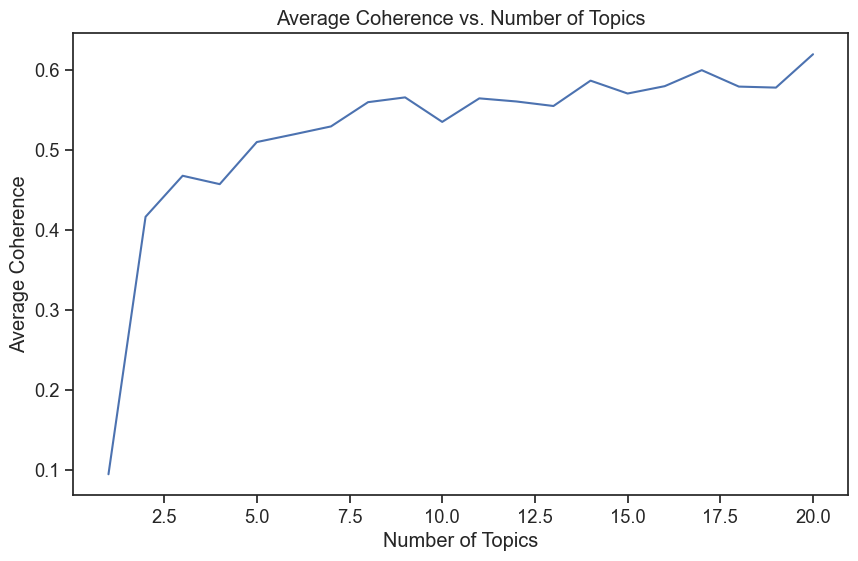

In [32]:
# X1 (code)
import matplotlib.pyplot as plt
import tomotopy as tp

def plot_coherence(training_data, max_topics, iterations):
    coherence_scores = []
    for num_topics in range(1, max_topics + 1):
        
        # Initialize the model:
        model = tp.LDAModel(k=num_topics)
        for doc in training_data:
            model.add_doc(doc.strip().split())
            
        # Train the model:
        for i in range(0, iterations, 10):
            model.train(10)
        
        # Calculate coherence:
        coh = tp.coherence.Coherence(model, coherence='c_v')
        coherence_scores.append(coh.get_score())
        
    # Plot:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_topics + 1), coherence_scores)
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.title('Average Coherence vs. Number of Topics')
    plt.show()

# Example usage:
plot_coherence(training_data, max_topics=20, iterations=100)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [112]:
# Q7a (code):
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))
    
# Function to get the top documents:
def get_top_docs(docs, topic_distributions, topic_number, n=5):

    sorted_data = []

    for i in range(len(topic_distributions)):
        distribution = topic_distributions[i]
        document = docs[i]
        sorted_data.append((distribution[topic_number], document))

    sorted_data.sort(reverse=True)

    topic_words = topics[topic_number]

    make_md(f"### TOPIC {topic_number}\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Tweet**: {doc}\n\n')

    return

# Function to get top documents for four specific topics:
def get_specific_top_docs(docs, topic_distributions, topic_number1, topic_number2, topic_number3, topic_number4, n=5):
    get_top_docs(docs, topic_distributions, topic_number1, n)
    get_top_docs(docs, topic_distributions, topic_number2, n)
    get_top_docs(docs, topic_distributions, topic_number3, n)
    get_top_docs(docs, topic_distributions, topic_number4, n)

    return

# Example usage:
topic_number1 = 2
topic_number2 = 17
topic_number3 = 12
topic_number4 = 15
# Call the function:
get_specific_top_docs(original_texts, topic_distributions, topic_number1, topic_number2, topic_number3, topic_number4)


### TOPIC 2

border wall must country democrats people security immigration great illegal



---


✨  
**Topic Probability**: 0.9508975744247437  
**Tweet**:  “Outrageous, it’s the Adam Schiff problem. People abusing the access to classified data to then go out in public and make allegations that didn’t prove to be true. You look at a decision to essentially investigate a political rival. Who made it?” James Freeman, @WSJ



✨  
**Topic Probability**: 0.9508975744247437  
**Tweet**:  ...The problem is, no matter what the Radical Left Democrats get, no matter what we give them, it will never be enough. Just watch, they will Harass &amp; Complain &amp; Resist (the theme of their movement). So maybe we should just take our victory and say NO, we’ve got a Country to run!



✨  
**Topic Probability**: 0.9471884965896606  
**Tweet**:  RT @Mike_Pence: Today is the culmination of three and a half years of renewed leadership in space. It’s a tribute to the courage of our astronauts, American ingenuity at @NASA &amp; @SpaceX, the support of the American **people** &amp; the vision and leadership of President @realDonaldTrump. 🇺🇸 https://t.co/YKck3CQ2Gy



✨  
**Topic Probability**: 0.9428732395172119  
**Tweet**:  Thank you Jessica! https://t.co/gxNRfFqZCm



✨  
**Topic Probability**: 0.9428732395172119  
**Tweet**:  Democrats are incapable of doing a good and solid Immigration Bill!



### TOPIC 17

president trump live thank tonight foxnews whitehouse watch join news



---


✨  
**Topic Probability**: 0.9234018325805664  
**Tweet**:  ....I can’t imagine any President having a better or closer relationship with their Vice President then the two of us. Just more FAKE NEWS, the Enemy of the People!



✨  
**Topic Probability**: 0.9190189838409424  
**Tweet**:  Do you believe this?  A total Scam! https://t.co/ihJmne0AbW



✨  
**Topic Probability**: 0.9141041040420532  
**Tweet**:  https://t.co/SzT60K4sW3



✨  
**Topic Probability**: 0.9141041040420532  
**Tweet**:  ....Lawsuits should be brought against all, including the Fake News Organizations, to rectify this terrible injustice. For all of the great lawyers out there, do we have any takers? When will the Noble Committee Act? Better be fast!



✨  
**Topic Probability**: 0.9085540175437927  
**Tweet**:  Democrats, who want Open Borders and care little about Crime, are incompetent, but they have the Fake News Media almost totally on their side!



### TOPIC 12

health care people americans drug must right country need make



---


✨  
**Topic Probability**: 0.9507461190223694  
**Tweet**: Trump has told the American **people** several hundred times that Mexico would pay for the wall. That is a lie. If his wall were to be built, Mexico would not pay for it. American taxpayers would.



✨  
**Topic Probability**: 0.9449462890625  
**Tweet**: Thank you to the 1.1 million **people** who tuned in live to the first-ever national Medicare for All town hall tonight. Together we will successfully move the United States to a Medicare-for-all, single-payer **health** **care** system and guarantee **health** **care** to all.



✨  
**Topic Probability**: 0.9426970481872559  
**Tweet**: Last year, the five largest **drug** companies in America made nearly $60 billion in profits. The top five pharma CEOs made over $113 million in total compensation in 2017.

Meanwhile, 1 in 5 Americans can’t afford their prescriptions. That should outrage every member of Congress.



✨  
**Topic Probability**: 0.9402562379837036  
**Tweet**: Trump is shutting down the government not just for his absurd wall. When you don't pay 800,000 federal workers you are destroying the concept of government in a democratic society, and moving to more privatization and corporate control over our lives.



✨  
**Topic Probability**: 0.9375981688499451  
**Tweet**: Here's what happened when a Republican senator challenged a Canadian doctor on their single-payer **health** **care** system. https://t.co/Weaz6vGbmB



### TOPIC 15

election vote voter fraud votes voting ballots biden trump mail



---


✨  
**Topic Probability**: 0.9414753317832947  
**Tweet**:  https://t.co/AMIT0WetT1



✨  
**Topic Probability**: 0.9224705100059509  
**Tweet**:  RT @gregkellyusa: So there’s ⁦@TTuberville⁩ —on his way to the US SENATE.  I hear we should be able to COUNT ON HIM on JAN 6th. He’s a world class COACH. Unlike most of the Bozos in the SWAMP—he’s going to Do something, not Be something.  Go TOMMY! https://t.co/X4DY7rPrGq



✨  
**Topic Probability**: 0.9180343151092529  
**Tweet**:  The thugs who accosted Senator @RandPaul and his wonderful wife, Kelly, together with those who made threats to many other people who had just attended the Republican National Convention at the White House, must be sought out and immediately arrested. Well documented evidence!



✨  
**Topic Probability**: 0.9180343151092529  
**Tweet**:  RT @PollWatch2020: 1). BREAKING: Democracy Institute shows Trump up nationally and in battlegrounds:  National Popular Vote: Trump 48 Biden 45  Battlegrounds of FL, IA, MI, MN, PA Trump 49 Biden 42



✨  
**Topic Probability**: 0.9114708304405212  
**Tweet**:  Heading to Toledo, Ohio, for first Rally of the year. Tremendous crowd. Here we go for a big 2020 Win!



#### Q7b (words)
**Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?**
- *Topic 2: Immigration and Border Security*:

Tweets in this topic primarily discuss issues related to border security, immigration, and criticism of Democrats' stance on these issues. The language used in them aligns with the rhetoric often employed by Donald Trump during his presidency, emphasizing topics like building a border wall, criticizing Democrats, and highlighting the importance of immigration policies for national security.

- *Topic 17: Media and Presidency*:

This topic seems to concentrate around discussions related to media coverage, Trump's presidency, and his relationship with the press. The tweets express sentiments about the media being biased or unfair towards Trump, defending his administration, and attacking Democrats. The language and themes are consistent with Donald Trump's frequent criticisms of the media and his portrayal of himself as a victim of unfair treatment.

- *Topic 12: Healthcare*:

Tweets in this topic focus on healthcare-related issues such as access to healthcare, drug prices, and criticisms of Trump's policies on healthcare. The language used aligns more closely with Bernie Sanders' viewpoints, as he has been a prominent advocate for Medicare for all and has criticized the pharmaceutical industry and the lack of affordable healthcare in the US.

- *Topic 15: Election and Politics*:

This topic revolves around discussions related to elections, voter fraud, political endorsements, and campaigning. While these topics are relevant to both Trump and Sanders, the language and sentiments expressed in the documents don't strongly favor one politician over the other. Both Trump and Sanders have been vocal about issues related to election integrity and have made statements regarding their respective election campaigns.


- *Conclusion:*
To conclude, while topics 2 and 17 seem to be more representative of Donald Trump's views and activities, topics 12 and 15 may align more closely with Bernie Sanders' viewpoints. 

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

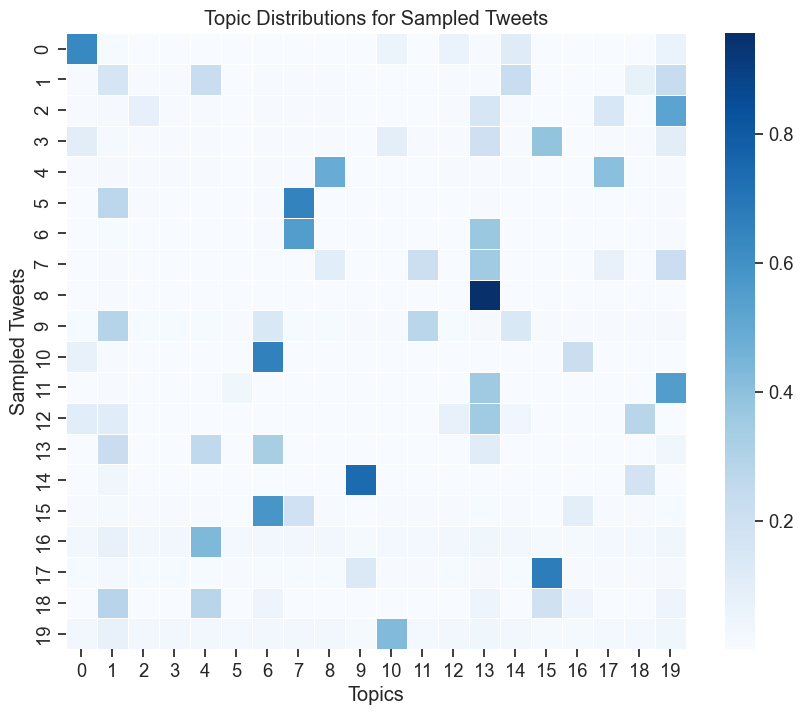

In [105]:
# Q8 (code)
import seaborn as sns
from random import sample

# Specify the sample:
target_labels = sample(titles, 20)

def visualize_topic_distributions(topic_distributions, titles, target_labels):
    # Find indices of target labels in the titles list:
    indices = [i for i, title in enumerate(titles) if title in target_labels]
    # Extract topic distributions for sampled tweets:
    sampled_topic_distributions = [topic_distributions[i] for i in indices]
    # Convert topic distributions to DataFrame:
    topic_df = pd.DataFrame(sampled_topic_distributions)
    
    # Create a heatmap:
    plt.figure(figsize=(10, 8))
    sns.heatmap(topic_df, cmap="Blues", linewidths=.5)
    plt.xlabel('Topics')
    plt.ylabel('Sampled Tweets')
    plt.title('Topic Distributions for Sampled Tweets')
    plt.show()

# Call the function:
visualize_topic_distributions(topic_distributions, titles, target_labels)


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

#### Q9 (words)
In the provided heatmap, the y-axis represents the sampled tweets, while the x-axis represents the topics. Each cell in the heatmap displays the distribution of topic probabilities for a particular tweet. Each row of the heatmap corresponds to a sampled tweet, and each column corresponds to a topic. The color intensity in each cell represents the probability of the corresponding topic for the respective tweet. The 'target_labels' variable contains a list of sampled tweets, and the heatmap visualizes the distribution of topic probabilities for these tweets.

Nevertheless, even with the sample limited to 20 tweets, this visualization is not very informative for the human interpreter. Therefore, below I would like to propose a different approach, that divides tweets by their authors and thus allows to make conclusions about the topic distribution in the much bigger sample – thanks to linking it with authorship. 

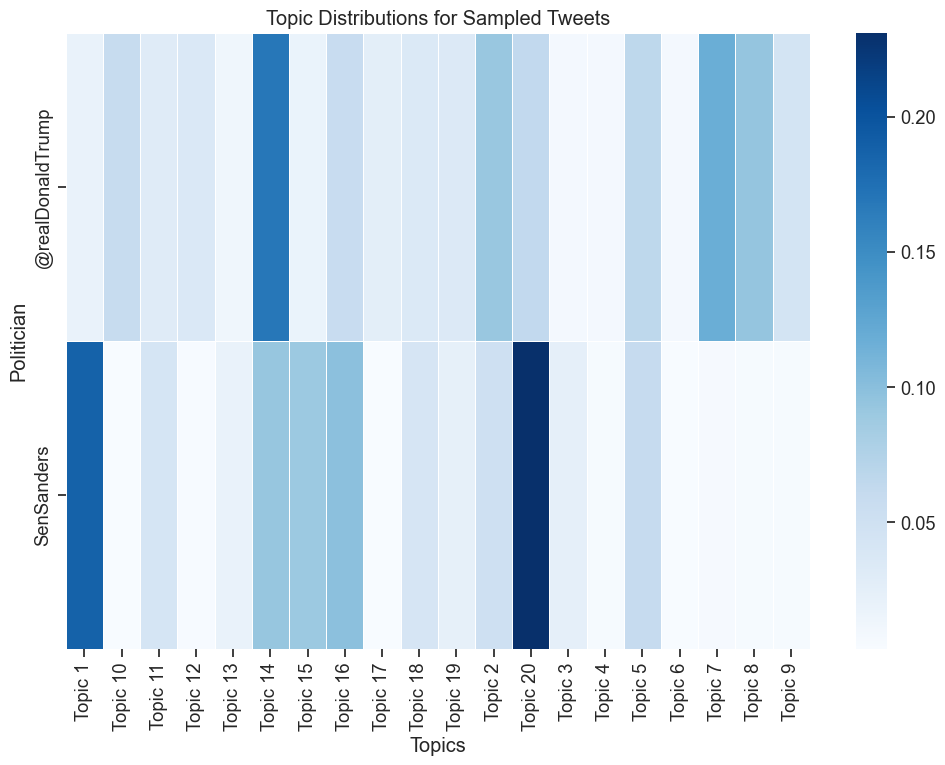

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import sample

def visualize_topic_distributions(topic_distributions, titles, sample_size=1000):
    # Find indices of target labels in the titles list:
    indices = [i for i, title in enumerate(titles) if title in target_labels]
    # Extract topic distributions for sampled tweets:
    sampled_topic_distributions = [topic_distributions[i] for i in indices]
    # Extract usernames for sampled tweets:
    sampled_usernames = [titles[i].split('_')[0] for i in indices]
    # Convert topic distributions to DataFrame:
    topic_df = pd.DataFrame(sampled_topic_distributions, columns=[f"Topic {i+1}" for i in range(len(sampled_topic_distributions[0]))])
    # Add 'Politician' column to the DataFrame:
    topic_df['Politician'] = sampled_usernames
    # Pivot the DataFrame for visualization:
    pivot_df = topic_df.pivot_table(index='Politician', aggfunc='mean').reset_index()
    pivot_df = pivot_df.set_index('Politician')
    
    # Create a heatmap:
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, cmap="Blues", linewidths=.5)
    plt.xlabel('Topics')
    plt.ylabel('Politician')
    plt.title('Topic Distributions for Sampled Tweets')
    plt.show()

# Call the function:
visualize_topic_distributions(topic_distributions, titles, sample_size=100)


### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

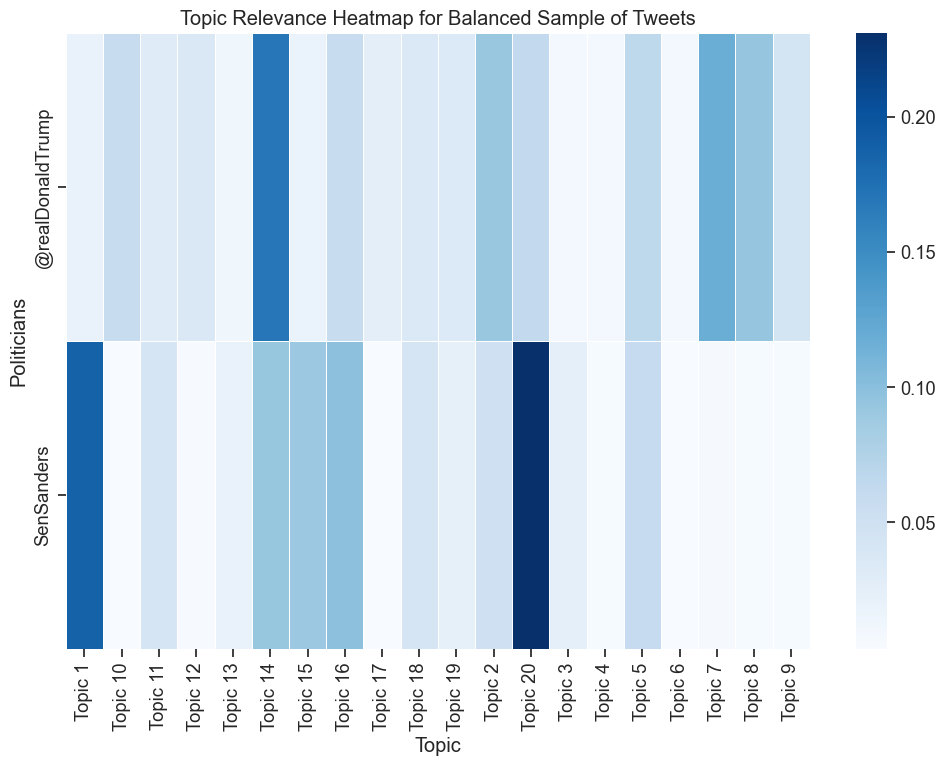

In [107]:
# X2 (code)
import random

trump_tweets = []
sanders_tweets = []

# Iterate through titles and select tweets for each politician:
trump_tweets = [title for title in titles if title.split('_')[0] == '@realDonaldTrump' and len(trump_tweets) < 50] + \
               [title for title in titles if title.split('_')[0] == 'SenSanders' and len(sanders_tweets) < 50]

sanders_tweets = [title for title in titles if title.split('_')[0] == 'SenSanders' and len(sanders_tweets) < 50] + \
                 [title for title in titles if title.split('_')[0] == '@realDonaldTrump' and len(trump_tweets) < 50]

# Combine the selected tweets for both politicians:
balanced_tweets = trump_tweets + sanders_tweets

def visualize_balanced_topic_distributions(topic_distributions, titles, target_labels):
    indices = []
    for i, title in enumerate(titles):
        if title in target_labels and i < len(topic_distributions):
            indices.append(i)

    sample_topic_distributions = []
    for i in indices:
        sample_topic_distributions.append(topic_distributions[i])

    # Make sure all titles are strings:
    titles = [str(title) for title in titles]

    # Extract sample topic distributions and politician usernames:
    sample_politicians_usernames = []
    for i in indices:
        sample_politicians_usernames.append(titles[i].split('_')[0])

    topic_df = pd.DataFrame(sample_topic_distributions, columns=[f'Topic {i+1}' for i in range(len(sample_topic_distributions[0]))])
    topic_df['politician'] = sample_politicians_usernames

    # Aggregate and find the mean distribution for every topic, for each of the politician to get numeric values:
    pivot_df = topic_df.pivot_table(index='politician', aggfunc='mean').reset_index()
    pivot_df = pivot_df.set_index('politician')

    # Create a heatmap:
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, cmap="Blues", linewidth=.6, xticklabels=True)
    plt.xlabel('Topic')
    plt.ylabel('Politicians')
    plt.title('Topic Relevance Heatmap for Balanced Sample of Tweets')
    plt.show()

# Call the function:
visualize_balanced_topic_distributions(topic_distributions, titles, target_labels)

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [96]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)
